In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\Ashish\Desktop\Analysis_project\cleaned_dataset_1.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')



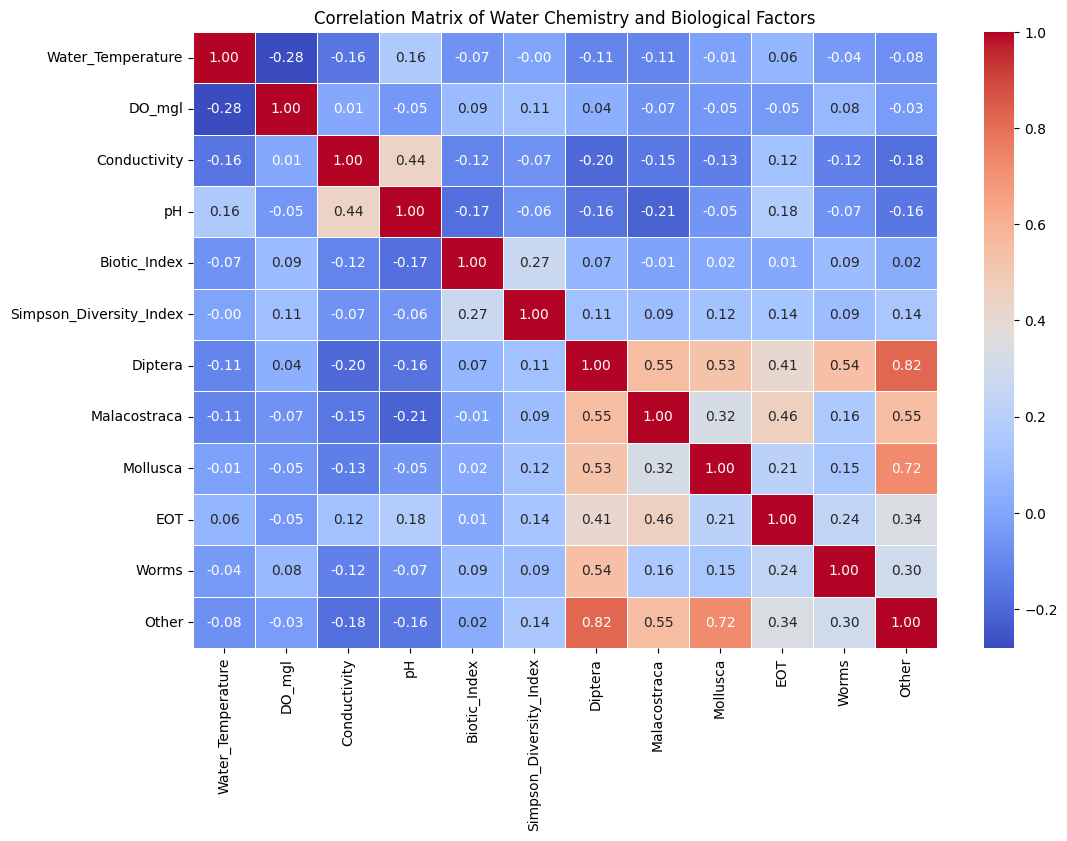

In [3]:
# Select water chemistry and biological response columns
water_chemistry = ['Water_Temperature', 'DO_mgl', 'Conductivity', 'pH']
biological_factors = ['Biotic_Index', 'Simpson_Diversity_Index', 'Diptera', 'Malacostraca', 'Mollusca', 'EOT', 'Worms', 'Other']

# Create a subset of data for correlation analysis
correlation_data = data[water_chemistry + biological_factors]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Water Chemistry and Biological Factors')
plt.show()


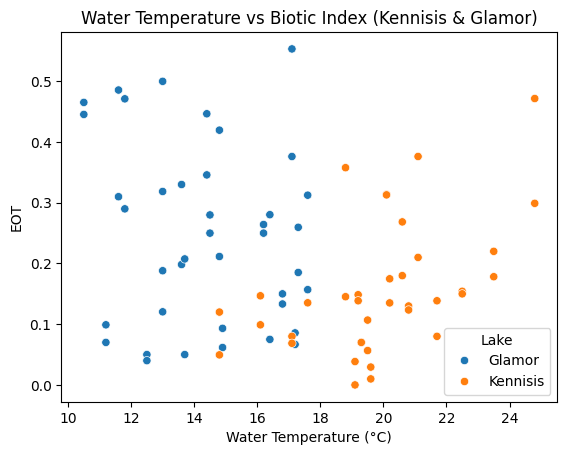

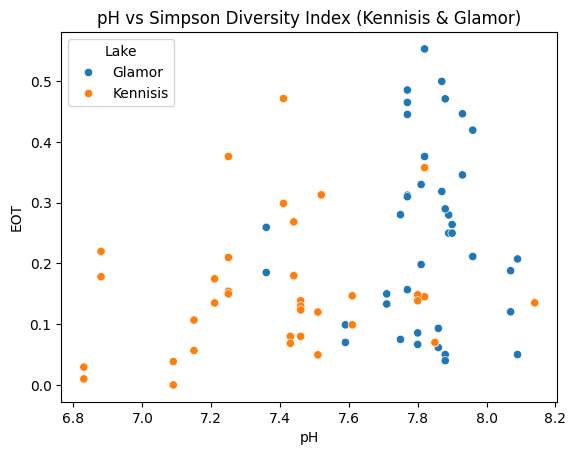

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Kennisis and Glamor lakes
filtered_data = data[(data['Lakes'] == 'Kennisis') | (data['Lakes'] == 'Glamor')]

# Scatterplot: Water Temperature vs Biotic Index
sns.scatterplot(data=filtered_data, x='Water_Temperature', y='EOT', hue='Lakes')
plt.title('Water Temperature vs Biotic Index (Kennisis & Glamor)')
plt.xlabel('Water Temperature (°C)')
plt.ylabel('EOT')
plt.legend(title='Lake')
plt.show()

# Scatterplot: pH vs Simpson Diversity Index
sns.scatterplot(data=filtered_data, x='pH', y='EOT', hue='Lakes')
plt.title('pH vs Simpson Diversity Index (Kennisis & Glamor)')
plt.xlabel('pH')
plt.ylabel('EOT')
plt.legend(title='Lake')
plt.show()


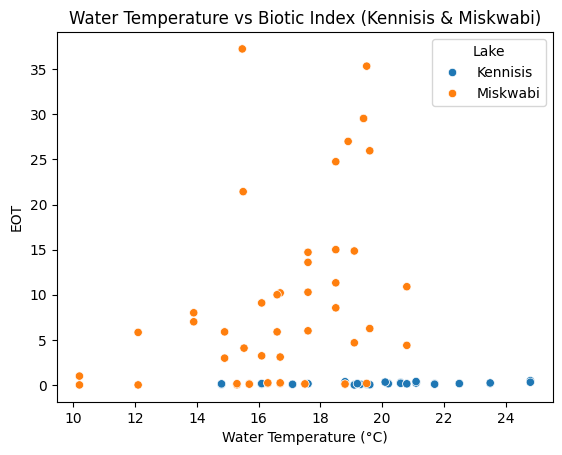

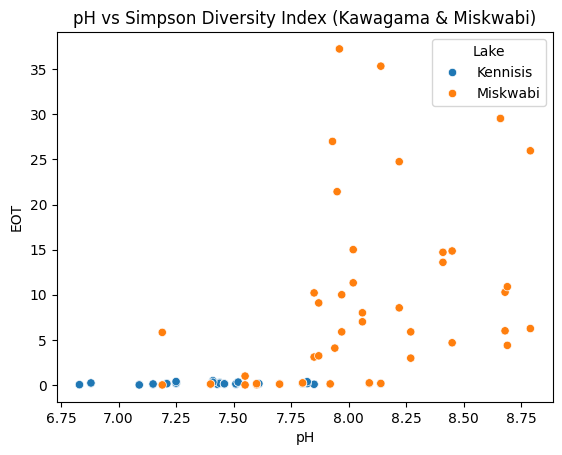

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Kennisis and Glamor lakes
filtered_data = data[(data['Lakes'] == 'Kennisis') | (data['Lakes'] == 'Miskwabi')]

# Scatterplot: Water Temperature vs Biotic Index
sns.scatterplot(data=filtered_data, x='Water_Temperature', y='EOT', hue='Lakes')
plt.title('Water Temperature vs Biotic Index (Kennisis & Miskwabi)')
plt.xlabel('Water Temperature (°C)')
plt.ylabel('EOT')
plt.legend(title='Lake')
plt.show()

# Scatterplot: pH vs Simpson Diversity Index
sns.scatterplot(data=filtered_data, x='pH', y='EOT', hue='Lakes')
plt.title('pH vs Simpson Diversity Index (Kawagama & Miskwabi)')
plt.xlabel('pH')
plt.ylabel('EOT')
plt.legend(title='Lake')
plt.show()

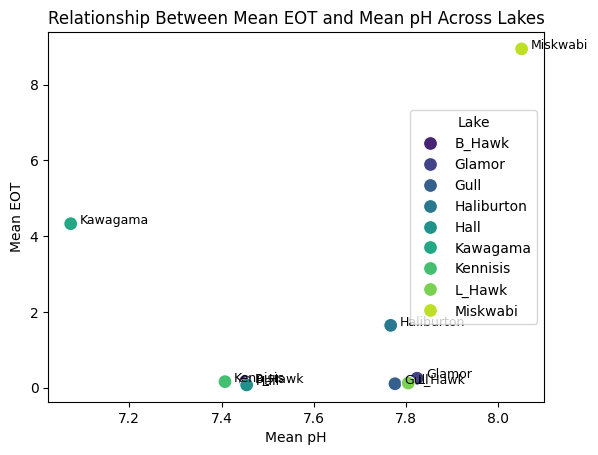

In [6]:
# Calculate mean EOT and pH for each lake
mean_stats = data.groupby('Lakes')[['EOT', 'pH']].mean().reset_index()

# Scatter plot to show the relationship between mean EOT and mean pH
sns.scatterplot(data=mean_stats, x='pH', y='EOT', hue='Lakes', s=100, palette='viridis')

# Annotate points with lake names
for i, row in mean_stats.iterrows():
    plt.text(row['pH'] + 0.02, row['EOT'], row['Lakes'], fontsize=9)

# Add labels and title
plt.title('Relationship Between Mean EOT and Mean pH Across Lakes')
plt.xlabel('Mean pH')
plt.ylabel('Mean EOT')
plt.legend(title='Lake')
plt.show()



In [7]:
from scipy.stats import pearsonr

# Example: Correlation between Water Temperature and Biotic Index
correlation, p_value = pearsonr(data['Water_Temperature'], data['Biotic_Index'])
print(f'Correlation: {correlation:.2f}, p-value: {p_value:.4f}')

# You can repeat this for other pairs of variables.


Correlation: -0.07, p-value: 0.2504


In [8]:
correlation, p_value = pearsonr(data['pH'], data['Simpson_Diversity_Index'])
print(f'Correlation: {correlation:.2f}, p-value: {p_value:.4f}')

# You can repeat this for other pairs of variables.


Correlation: -0.06, p-value: 0.3278


In [9]:
# Focus on water chemistry columns
water_chemistry = ['Water_Temperature', 'DO_mgl', 'Conductivity', 'pH']

# Summary statistics
print(data[water_chemistry].describe())


       Water_Temperature      DO_mgl  Conductivity          pH
count         305.000000  305.000000    305.000000  305.000000
mean           16.193869    8.812985     49.369513    7.610340
std             2.845538    1.236615     29.293478    0.501217
min             8.400000    5.500000     10.600000    6.210000
25%            14.900000    8.300000     20.800000    7.300000
50%            16.000000    8.758000     45.036000    7.650000
75%            18.100000    9.240000     72.300000    7.890000
max            24.800000   19.260000    132.000000    9.350000


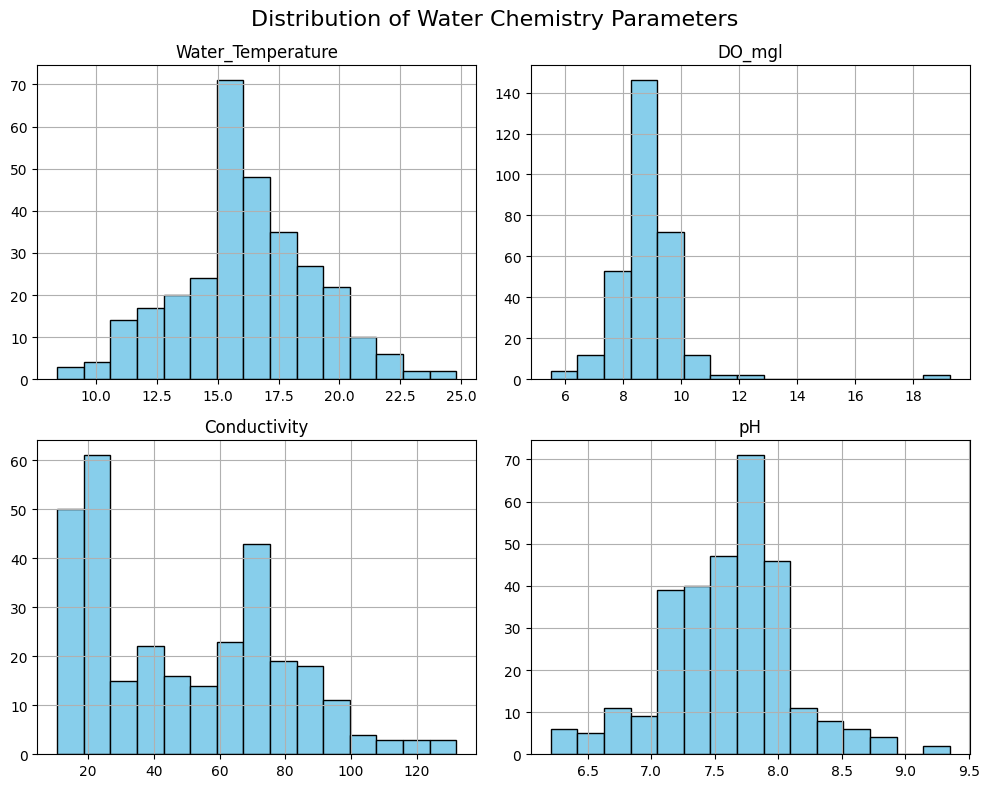

In [10]:
# Plot histograms for each water chemistry parameter
import matplotlib.pyplot as plt

data[water_chemistry].hist(bins=15, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Water Chemistry Parameters', fontsize=16)
plt.tight_layout()
plt.show()


In [11]:
print(data.columns)

Index(['Lakes', 'Headwater_status', 'Site_Code', 'Latitude', 'Longitude',
       'Date', 'Time', 'Water_Temperature', 'DO_mgl', 'Conductivity', 'pH',
       'Sampling_Distance', 'Sampling_Time_Min', 'Sampling_Time_Sec',
       'Max_Depth', 'Biotic_Index', 'Simpson_Diversity_Index', 'Diptera',
       'Malacostraca', 'Mollusca', 'EOT', 'Worms', 'Other'],
      dtype='object')


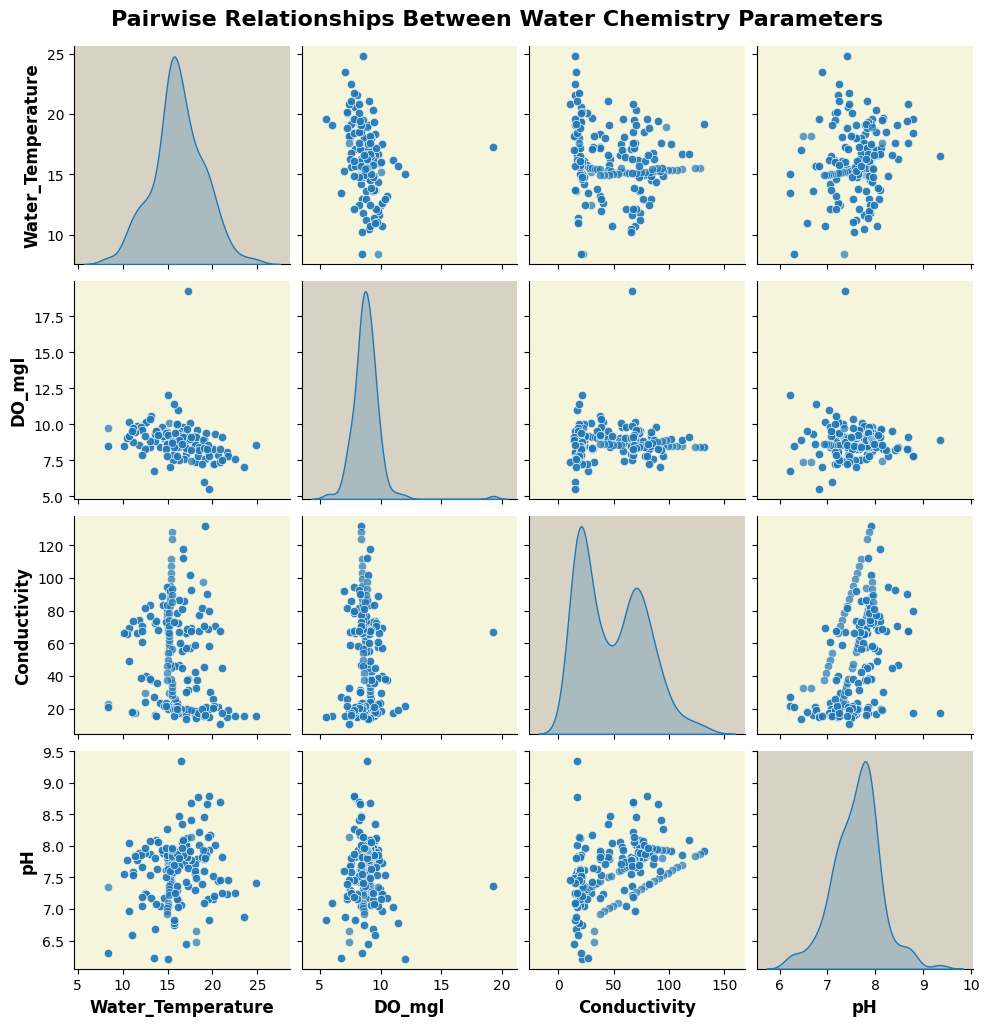

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize relationships between water chemistry parameters
pairplot = sns.pairplot(
    data[water_chemistry],
    diag_kind='kde',
    plot_kws={'alpha': 0.7}
)

# Customize labels, tick labels, and graph title
for i, ax in enumerate(pairplot.axes.flatten()):
    # Set bold and larger font for axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')

    # Set larger font for axis tick labels
    ax.tick_params(axis='x', labelsize=10)  # X-axis tick font size
    ax.tick_params(axis='y', labelsize=10)  # Y-axis tick font size

    # Alternate the bar colors for each axis
    if i % (len(pairplot.axes) + 1) == 0:  # Diagonal axes
        ax.set_facecolor('#d8d2c4')  # Beige5c6b61
    else:  # Off-diagonal axes
        ax.set_facecolor('#f5f5dc')  # Muted greenish-brown

# Style the main title
pairplot.fig.suptitle(
    'Pairwise Relationships Between Water Chemistry Parameters',
    y=1.02,
    fontsize=16,
    fontweight='bold'
)

plt.show()


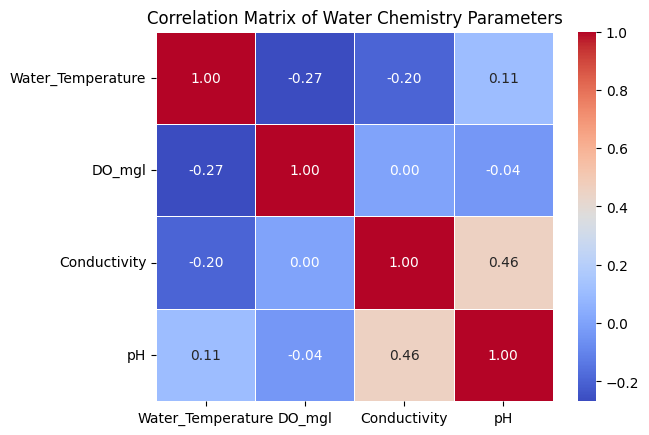

In [14]:
# Compute correlation matrix for water chemistry
correlation_matrix = data[water_chemistry].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Water Chemistry Parameters')
plt.show()
